#### Importing required libraries.


In [1]:
import re
import string
from matplotlib import pyplot as plt
import pandas as pd
from textblob import TextBlob
import tweepy
from os.path import exists as file_exists
import logging
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import datetime

plt.style.use("seaborn")

### Connecting to Twitter using tweepy To download tweets
1.  consumer_key =="consumer API_KEY provided by twitter"
2.  consumer_secret=="API_SECRET_KEY provided by twitter"
3.  data_source =="Location of previously downloaded data csv"
4.  Today = "todays date"
5.  yesterday="Refers to range of days from today, this is neccessary to get tweets from number of days"



In [2]:
consumer_key = "WiCACCV25MGR9e5cH3G6Mo5yX"
consumer_secret = "3S2mZzCekm2AaQ5YYRS8mNaMPY4fBJvOebaRwUQPtTVhK8y0pG"
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
data_source = 'data/Ukraine_war.csv'
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)


def access():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret
                               )
    api = tweepy.API(auth)
    tweets_list = tweepy.Cursor(api.search, q=f"#UkraineWar since:{str(yesterday)} until:{str(today)}", tweet_mode='extended').items()


    for tweet in tweets_list:
        try:
            text = tweet._json["full_text"]
            favourite_count = tweet.favorite_count
            retweet_count = tweet.retweet_count
            created_at = tweet.created_at
        except Exception:
            continue
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    return [line]



Preprocessing funtion to clean the tweets

In [3]:
# data preprocessing
def clean_text(text: str):
    # remove @ tag
    text = re.sub(r'@[A-Za-z0-9]+', "", text)
    #     removing hash tags
    text = re.sub(r'#', "", text)
    # removing links
    text = re.sub(r'https?://\S+', "", text)
    # removing RT/RTs (ReTweets)
    text = re.sub(r'RT[\s]+', "", text)
    #      remove repeating words
    text = re.sub('Find out more at', "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

#### Sentiment Analysis using TextBlob


TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively uses Natural Language ToolKit (NLTK) to achieve its tasks.

NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data.

TextBlob returns: 

1.   polarity sentence
2.   subjectivity sentence



In [4]:
# polarity

def get_polarity(text):
    """
    this defines the orientation of the expressed sentiment,
    for instance is this text positive, negative or neutral sentiment
    it ranges from 1 to -1 where:
    @ -1= very negative
    @0=neutral
    @1= very positive
    """

    return TextBlob(text).sentiment.polarity


In [5]:
# subjectivity

def get_subjectivity(text):
    """"
    -this describes how factual an expression is
    it ranges from 0 to 1
    where
    0=being completely factual
    1=being completely personal
    """
    return TextBlob(text).sentiment.subjectivity


In [6]:
# Get analysis about the above
def get_analysis(score):
    # get sentiment using polarity of the tweet
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

Processing tweets

In [7]:
# Analysis starts here by checking if data is available
def check_data():
    if file_exists(data_source):
        logging.info("Data source available. Sourcing")
        return pd.read_csv(data_source)
    # create a dataframe by streaming data from twitter
    logging.info("data source unavailable sourcing from twitter api")
    logging.warning("twitter only has a limit of 100 tweets per hour. More than that it will raise an error")
    data = pd.Dataframe(access())
    return data.to_csv("Ukraine_war.csv")

In [8]:
# clean downloaded dataa
def clean_dataframe():
    data = check_data()
    # removing stop words,commas etc
    logging.info("Preproccesing tweets")
    data['tweets'] = data['content'].apply(clean_text)
    return data
# clean_dataframe()

In [9]:
# Analysis using polarity and subjectiviy
def sentiment_analysis():
    if file_exists('data/cleaned.json'):
        return pd.read_json('data/cleaned.json')
    cleaned_data = clean_dataframe()
    # compute subjectivity and polarity (Sentiment analysis)
    logging.info("Determining orientation of tweets")
    cleaned_data['subjectivity'] = cleaned_data['tweets'].apply(get_subjectivity)
    logging.info("determining how factual or personal tweets are ")
    cleaned_data['polarity'] = cleaned_data['tweets'].apply(get_polarity)
    
     # get analysis column depending on polarity(orientation of expressed sentiment)
    cleaned_data['analysis'] = cleaned_data['polarity'].apply(get_analysis)
    logging.info("Analysis done!")
    cleaned_data.to_json('data/cleaned.json')
    return cleaned_data

Data = sentiment_analysis()

Checking Postive tweets

In [10]:

def positive_tweets(df):
    sorted_data = df.sort_values(by=['polarity'])
    return [sorted_data["tweets"][position] for position in range(sorted_data.shape[0]) if sorted_data['analysis'][position] == "Positive"]

for counter, i in enumerate(positive_tweets(Data)[:8], start=1):
    print(f'{counter}. {i}')

1. There was an anti war protest for Ukraine as well but it’s not getting any headlines 

Serbia has a good relationship with both Ukraine and Russia both counties have supported Serbian territorial integrity over Kosovo 

Stop pitting Orthodox Christians against each other  
2. sanctions are truly recordbreaking and of course needed

but what if such huge sanctions get russia to the point where WW3 will be the only profitable solution

Ukraine NATO USA war Politics

—What do you think It is possible
3. I hope Edward Snowden is ok and managed to leave Russia
UkraineWar
4. There has been an internecine war in Ukraine 

between the true Armed Forces and the Azov Nazis

with open warfare and shelling

Is this more of that StanGrant Peter Dutton

insiders 

Im keen to hear your thoughts  auspol  
5.   Maris  WWIII would kill orders of magnitude more people than this war could ever hope to And Ukraine would still be destroyed
6.   By that logic since you call Russia the aggresssor NATO shou

Negative Tweets

In [11]:

def negative_tweets(df):
    sorted_data = df.sort_values(by=['polarity'])
    return [sorted_data["tweets"][position] for position in range(sorted_data.shape[0]) if sorted_data['analysis'][position] == "Negative"]


for counter, i in enumerate(negative_tweets(Data)[:10], start=1):
    print(f'{counter}. {i}')

1. russia   Ukraine ru    OSCE Its not Russophobia we just hate Putin and all his enablers  Russian people we ❤️  Its also not special military operation its Putin war crimes against Ukraine and its people 💛💙🇺🇦🇨🇦❤️🤍IStandWithUkraine
2.  Remember the biggest mistake made by those who supported Afghanistan’s war against the Soviets was they abandoned a nation that had an average male age of 13 years
Imagine that scenario in Ukraine with Azov fighters left dominant after the fact
3.  Kovalev You MUST understand that there is not just a hugely tragic conventional war going on in Ukraine but also an information war going on in Russia which ALL right minded people would want Putin’s Kremlin defeated
4.   Didn’t the Indian administration notify all Indian students to leave Ukraine as war was eminent prior to the war starting  Not sure if the students got the news on time …
5. Sounds like somebody got some serious criminal Ukraine shit he dont want getting out

Graham I‘m Going to Introduce a 

Neutral Tweets

In [12]:

def neutral_tweets(df):
    sorted_data = df.sort_values(by=['polarity'])
    return [sorted_data["tweets"][position] for position in range(sorted_data.shape[0]) if sorted_data['analysis'][position] == "Neutral"]

for counter, i in enumerate(neutral_tweets(Data)[:10], start=1):
    print(f'{counter}. {i}')

1.  NATO followed USA into Afghanistan forgotten already by tribe of Western journalists Hopefully not Biden who bemoaned US losses not Afghan allies all forgotten in the headlines of Ukraine war Another Syria coming  West arms insurgents destabilises
2.  This war could have been avoided by ensuring to Putin that Ukraine could NOT join NATO
3. Yes or No The world is in a preWorld War situation with the UkraineRussianWar  Ukraine Russia CzarVladimir
4. The US and NATO oppose a nofly zone in Ukraine Such a move they have warned could lead to fullfledged war in Europe Russian President Vladimir Putin said Saturday that countries that impose such a nofly zone would be considered to be participating in the conflict
5. US draft plans for governmentinexile guerrilla war in Ukraine – reports 
6.  Your reaction after finding out you can be sentenced to 15 YEARS in a Russian prison for protesting the war with Ukraine
15 years in prison for posting unfavorable things about Russia or Putin and the

#### Visualizations

Most common words using WordCloud

In [13]:
def word_cloud(text):
    plt.figure(figsize=(20,20))
    wordcloud = WordCloud(random_state=20,max_font_size=120).generate(text)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

Remove stop_words before Visualizations

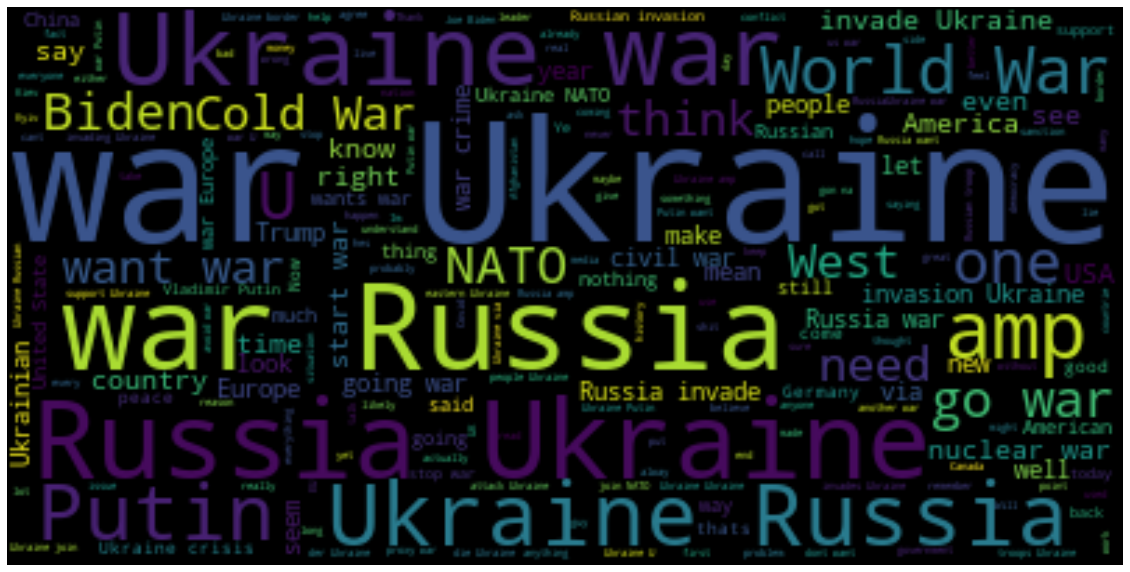

In [14]:
def common_words(df):
    tweet_corpus = ''.join(list(df['tweets']))
    word_tokens = word_tokenize(tweet_corpus)
    # remove stop_words
    stop_words = stopwords.words('english')
    words = [word for word in word_tokens if word not in stop_words]
    # visualize the words
    all_words = ' '.join(words)
    word_cloud(all_words)

common_words(Data)

Histogram showing distribution of tweets

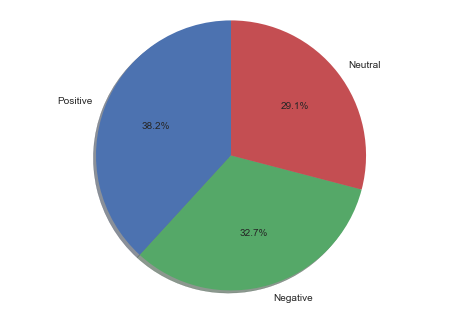

In [15]:
p=dict(Data['analysis'].value_counts())
def pie(p: dict):
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = list(p.values())
    explode = (0, 0, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
pie(p)

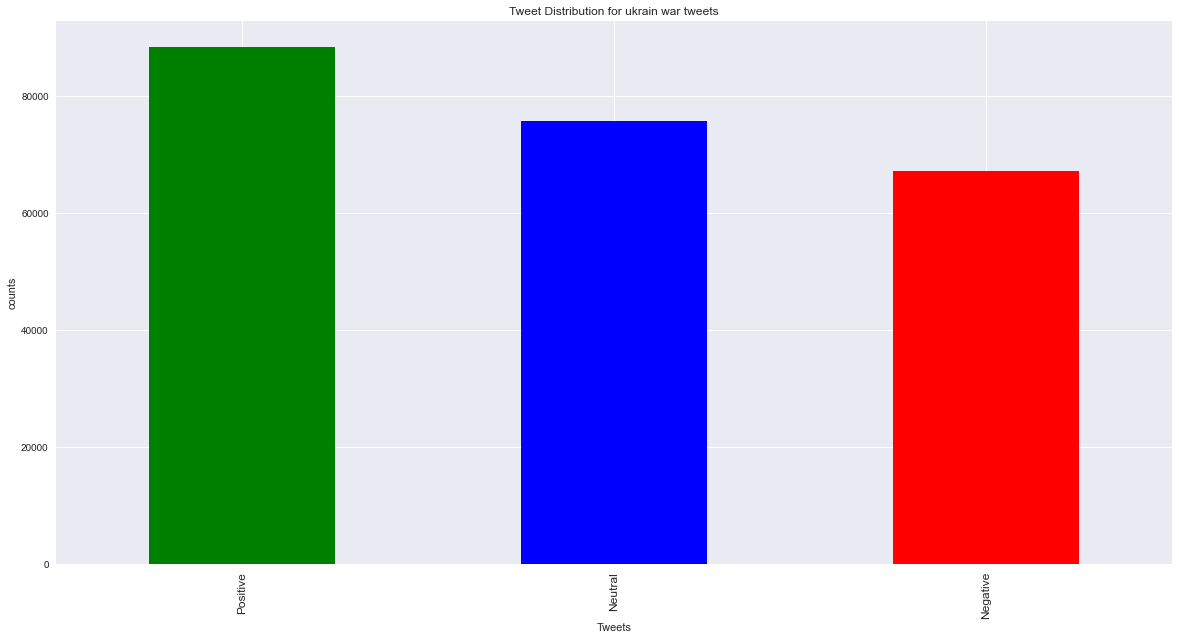

In [16]:
def histogram(df):
    plt.figure(figsize=(20, 10))
    plt.title("Tweet Distribution for ukrain war tweets")
    plt.xlabel("Tweets")
    plt.ylabel("counts")
    plt.xticks(rotation=10, size=12)
    df['analysis'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
    plt.show()

histogram(Data)

scatter chart showing distribution of sentiment

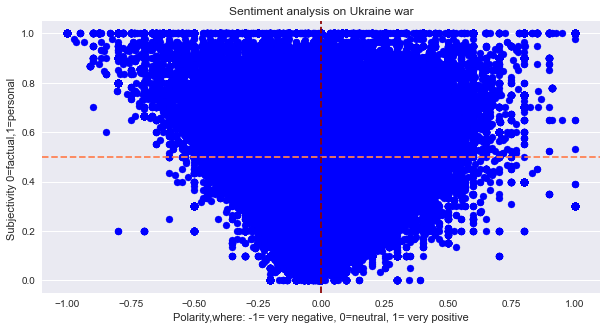

In [17]:
def scatter_visualization(df):
    plt.figure(figsize=(10, 5))
    plt.scatter(df['polarity'], df['subjectivity'], color=['blue'])
    plt.title("Sentiment analysis on Ukraine war")
    plt.xlabel('Polarity,where: -1= very negative, 0=neutral, 1= very positive')
    plt.ylabel('Subjectivity 0=factual,1=personal ')
    plt.grid(axis='x')
    plt.axhline(y=0.5, color='coral', linestyle='--')
    plt.axvline(x=0, color='darkred', linestyle='--')
    plt.savefig('scatter.png')


scatter_visualization(Data)